In [227]:
# 0)
# a)

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, mean_squared_error
import numpy as np 


data = sns.load_dataset("tips")

data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


(None,
        total_bill         tip        size
 count  244.000000  244.000000  244.000000
 mean    19.785943    2.998279    2.569672
 std      8.902412    1.383638    0.951100
 min      3.070000    1.000000    1.000000
 25%     13.347500    2.000000    2.000000
 50%     17.795000    2.900000    2.000000
 75%     24.127500    3.562500    3.000000
 max     50.810000   10.000000    6.000000)

In [199]:
describe_data = data.describe()
describe_data = describe_data.drop("count", axis=0)

describe_data

,total_bill,tip,size
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


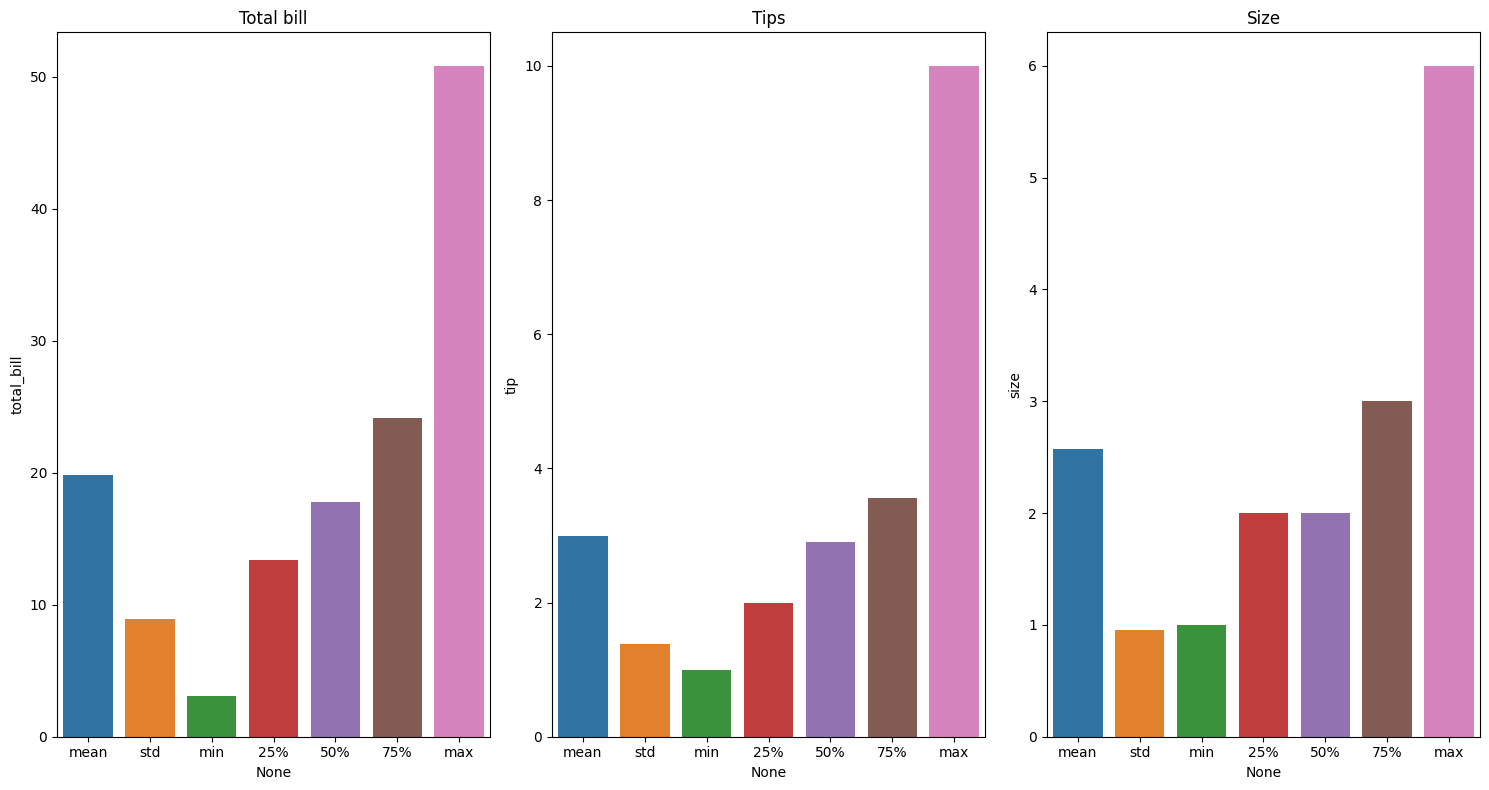

In [200]:
#b)
fig, ax = plt.subplots(1, 3,figsize = (15,8))
sns.barplot(ax=ax[0],data=describe_data, x=describe_data.index, y="total_bill", hue=describe_data.index)
ax[0].set_title("Total bill")

sns.barplot(ax=ax[1],data=describe_data, x=describe_data.index, y="tip", hue=describe_data.index)
ax[1].set_title("Tips")

sns.barplot(ax=ax[2],data=describe_data, x=describe_data.index, y="size", hue=describe_data.index)
ax[2].set_title("Size")
plt.tight_layout()


In [201]:
count = data["sex"].value_counts()

count.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category', name='sex')

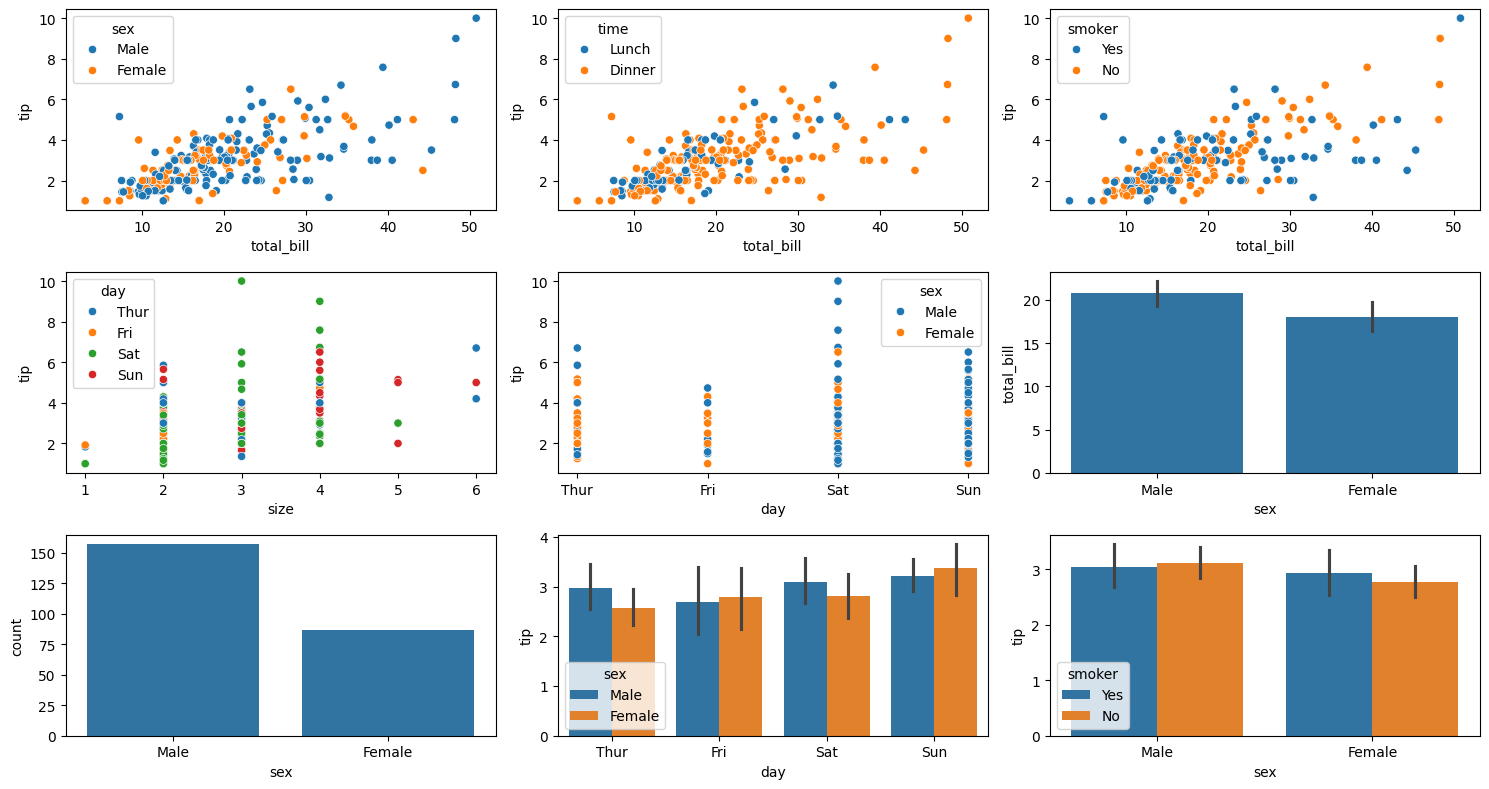

In [202]:
# c)

fig, ax = plt.subplots(3,3, figsize = (15, 8))

sns.scatterplot(ax=ax[0,0],data=data, x="total_bill", y="tip", hue="sex")
sns.scatterplot(ax=ax[0,1],data=data, x="total_bill", y="tip", hue="time")
sns.scatterplot(ax=ax[0,2],data=data, x="total_bill", y="tip", hue="smoker")

sns.scatterplot(ax=ax[1,0],data=data, x="size", y="tip", hue="day")
sns.scatterplot(ax=ax[1,1],data=data, x="day", y="tip", hue="sex")
sns.barplot(ax=ax[1,2],data=data, x="sex", y="total_bill")

sns.barplot(ax=ax[2,0], data=count)
sns.barplot(ax=ax[2,1], data=data, x="day", y="tip", hue="sex")
sns.barplot(ax=ax[2,2], data=data, x="sex", y="tip", hue="smoker")


plt.tight_layout()

**d)**

- we see that there is almost dubble the amount of male patrons then women. 
- Very few 1 person tabels and tipping is very low. Most parties are between 2-4 and best tips from oarties from 4. Most likley from bieng bigger groupse. 

- the weekend is also better fro  tips, not only volume also value. 
- Dinner service is musch better then lunch. 
- Men spend sligltly more then women.

In [203]:
# 1)
X, y = data.drop("tip", axis=1), data["tip"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,total_bill,sex,smoker,day,time,size
234,15.53,Male,Yes,Sat,Dinner,2
227,20.45,Male,No,Sat,Dinner,4
180,34.65,Male,Yes,Sun,Dinner,4
5,25.29,Male,No,Sun,Dinner,4
56,38.01,Male,Yes,Sat,Dinner,4
...,...,...,...,...,...,...
106,20.49,Male,Yes,Sat,Dinner,2
14,14.83,Female,No,Sun,Dinner,2
92,5.75,Female,Yes,Fri,Dinner,2
179,34.63,Male,Yes,Sun,Dinner,2


In [204]:
mean_X = X_train[["total_bill", "size"]].mean()
std_X = X_train[["total_bill", "size"]].std()

stdz_X_train = (X_train[["total_bill", "size"]] - mean_X) / std_X
stdz_X_test =(X_test[["total_bill", "size"]] - mean_X) / std_X

print(f"Train data:\n{stdz_X_train.describe()}\n\nTest data:\n{stdz_X_test.describe()}")

Train data:
         total_bill          size
count  1.700000e+02  1.700000e+02
mean   6.791953e-17 -1.985340e-16
std    1.000000e+00  1.000000e+00
min   -1.603041e+00 -1.694634e+00
25%   -7.587694e-01 -6.236758e-01
50%   -2.711394e-01 -6.236758e-01
75%    5.332300e-01  4.472826e-01
max    3.356916e+00  3.660158e+00

Test data:
       total_bill       size
count   74.000000  74.000000
mean    -0.191380  -0.044779
std      0.924957   1.066389
min     -1.898040  -1.694634
25%     -0.804175  -0.623676
50%     -0.303061  -0.623676
75%      0.229424   0.447283
max      3.066319   3.660158


In [ ]:
#3.

poly_feature = PolynomialFeatures(degree=2)

poly_feature.fit_transform(stdz_X_train)
poly_X_train = poly_feature.transform(stdz_X_train)
poly_X_test = poly_feature.transform(stdz_X_test)

poly_feature.fit_transform(stdz_X_test)
poly_X_test2 = poly_feature.transform(stdz_X_test)

compare = poly_X_test == poly_X_test2
comp_sum = compare.sum()

print(f"Compare size: {compare.size}. Sum of compares: {comp_sum}. are they same size: {comp_sum == compare.size}")


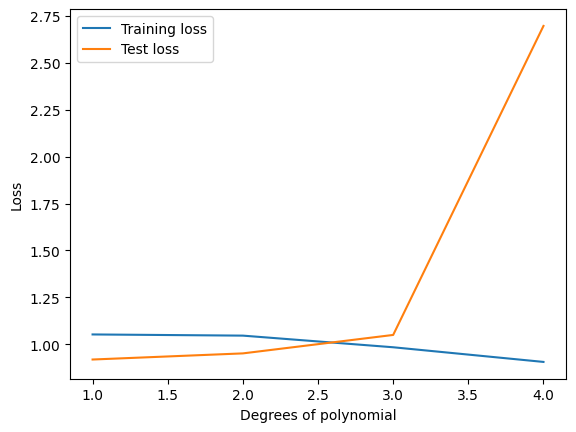

In [226]:
#4)
RMSE_train = []
RMSE_test = []

for i in range(1, 5):
    poly_feature = PolynomialFeatures(degree=i, include_bias=False)
    poly_X_train = poly_feature.fit_transform(stdz_X_train)
    poly_X_test = poly_feature.transform(stdz_X_test)
    
    linear_model = LinearRegression()
    linear_model.fit(poly_X_train, y_train)
    y_pred = linear_model.predict(poly_X_train)
    
    RMSE = root_mean_squared_error(y_train, y_pred)

    RMSE_train.append(RMSE)
    
    linear_model = LinearRegression()
    linear_model.fit(poly_X_train, y_train)
    y_pred = linear_model.predict(poly_X_test)
    
    RMSE = root_mean_squared_error(y_test, y_pred)
    RMSE_test.append(RMSE)

fig, ax = plt.subplots()
ax.plot(range(1,5), RMSE_train, label="Training loss")
ax.plot(range(1, 5), RMSE_test, label="Test loss")
ax.set_xlabel("Degrees of polynomial")
ax.set_ylabel("Loss")
plt.legend()


In [242]:
# 5)
# a)
ridge_model = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 5, 10], scoring="neg_mean_squared_error")
ridge_model.fit(stdz_X_train, y_train)
y_pred_ridge = ridge_model.predict(stdz_X_test)



metrics_ridge = {"RMSE":root_mean_squared_error(y_test, y_pred_ridge),
                  "MSE": mean_squared_error(y_test, y_pred_ridge),
                  "MAE": mean_absolute_error(y_test, y_pred_ridge)}

# b)

lasso_model = LassoCV(n_alphas=100, max_iter=10000)
lasso_model.fit(stdz_X_train, y_train)
y_pred_lasso = lasso_model.predict(stdz_X_test)

metrics_lasso = {"RMSE":root_mean_squared_error(y_test, y_pred_lasso),
                  "MSE": mean_squared_error(y_test, y_pred_lasso),
                  "MAE": mean_absolute_error(y_test, y_pred_lasso)}

#c)

elastic_model = ElasticNetCV(l1_ratio=[.001, .01, .05, .1, .5, .9, .95, 1], max_iter=10000)
elastic_model.fit(stdz_X_train, y_train)
y_pred_elastic = elastic_model.predict(stdz_X_test)

metrics_elastic = {"RMSE":root_mean_squared_error(y_test, y_pred_elastic),
                  "MSE": mean_squared_error(y_test, y_pred_elastic),
                  "MAE": mean_absolute_error(y_test, y_pred_elastic)}

print(f"Ridge\nAlpha: {ridge_model.alpha_}")
for metric in metrics_ridge:
    print(f"{metric}: {metrics_ridge[metric]}")
print("\n")

print(f"Lasso\nAlpha: {lasso_model.alpha_}")
for metric in metrics_lasso:
    print(f"{metric}: {metrics_lasso[metric]}")
print("\n")

print(f"Elastic\nAlpha: {elastic_model.alpha_}")
for metric in metrics_elastic:
    print(f"{metric}: {metrics_elastic[metric]}")

Ridge
Alpha: 10.0
RMSE: 0.9142941625932007
MSE: 0.8359338157520022
MAE: 0.6975948124107848


Lasso
Alpha: 0.0009834536161839973
RMSE: 0.9177338144842524
MSE: 0.8422353542478161
MAE: 0.6960004979051502


Elastic
Alpha: 0.11307326748567506
RMSE: 0.9113901397796697
MSE: 0.8306319868876059
MAE: 0.698753360876723
